# Стратегия взаимодействия с клиентами в  «Культурист-датасаентист» 


Основная цель — провести анализ и подготовить план действий по удержанию клиентов для фитнес-клуба. 
* определеить вероятность оттока для каждого клиента;
* описать типичного клиента, выделить основные группы клиентов сформировать типичные портреты клиентов
* описать признаки, вклияющие на отток
* сделать выводы и разработать рекомендации по повышению качества работы с клиентами

* <a href='#Section 1'> 1. Изучение данных</a>
* <a href='#Section 2'> 2. Исследовательский анализ данных</a>
* <a href='#Section 3'> 3. Модель прогнозирования оттока клиентов</a>
* <a href='#Section 4'> 4. Кластеризация клиентов</a>
* <a href='#Section 5'> 5. Выводы и рекомендации </a>

<a id='Section 1'></a>
## Изучение данных

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import KMeans


In [2]:

df = pd.read_csv('/datasets/gym_churn.csv')
df

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0


<a id='Section 2'></a>
## Исследовательский анализ данных

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


In [4]:
df.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


### Вывод
Средний возраст клиентов - 29 лет, большинство указало свой телефон, так что в случае чего можно "догнать" клиентов и вернуть. В среднем с момента первого обращения клиента прошло 3.7месяцев. В неделю в среднем посещают 1.8 раз, а за последний месяц 1.7. Главный для нас показатель - отток - 26% клиентов отсеиваются. 

In [5]:
df.groupby('Churn').mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


### Вывод
Люди, которые пришли через друзей (в рамках акции) реже отваливаются, похоже, что друзья мотивируют заниматься. Средняя длительность текущего абонимента также различается, у отвалившихся она 1.7, а у клиентов 5.7, те, кто берет на небольшой срок абонемент меньше мотивированы посещать. Средний возраст отличается, занимаются люди около 30 лет, а клиенты помладше - 27лет, чаще уходят.  Срок окончания абонемента меньше, чем у тех, кто остается с "Культуристом". Время с момента обращения в фитнес центр у клиентов 2 месяца, а у тех, кто в оттоке - 1.4. Средняя частота посещений в месяц у клиентов 2, а в оттоке -1.  
Таким образом, почти по всем показателям видна разница между теми, кто остается клиентом и теми, кто отваливается. Разве что пол не имеет никакого значения.

### Гистограммы для оттока и клиентов 

In [6]:
ottok = df[df['Churn']== 1]
client = df[df['Churn']== 0]

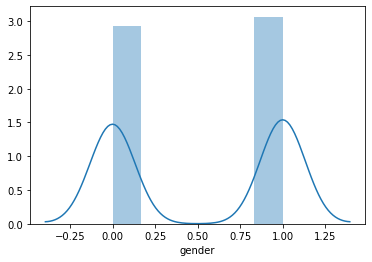

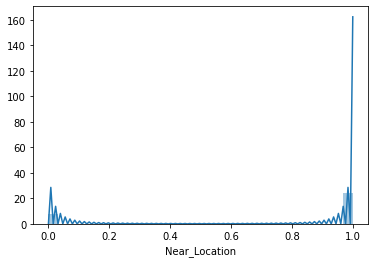

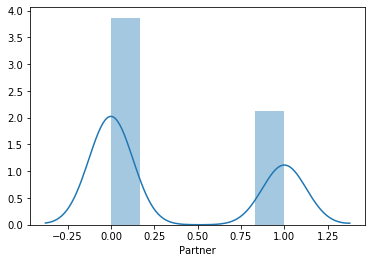

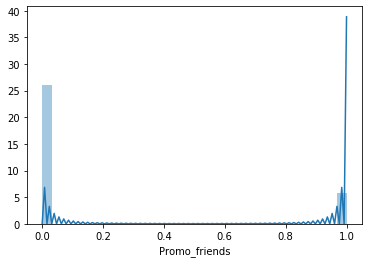

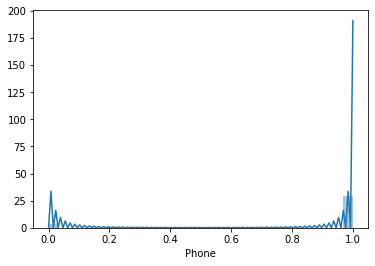

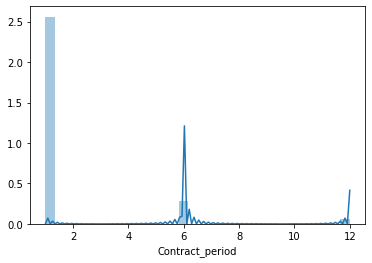

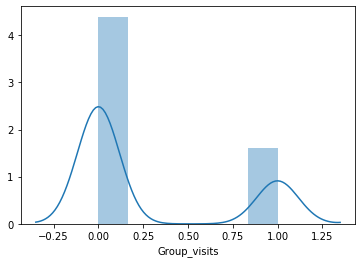

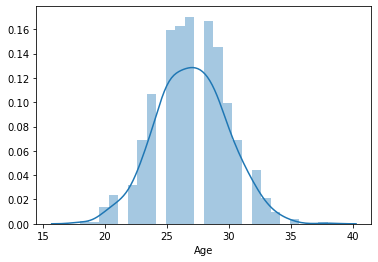

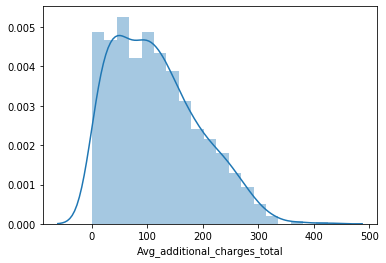

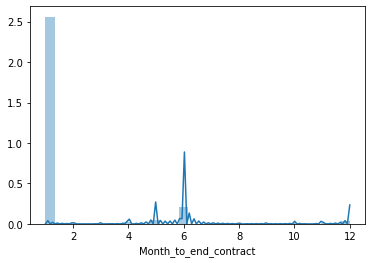

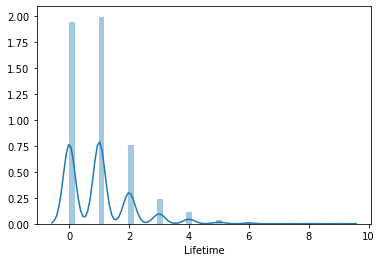

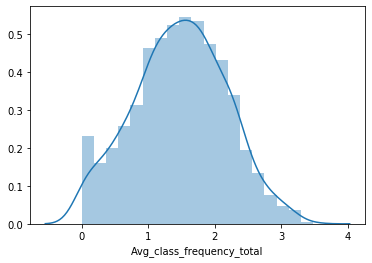

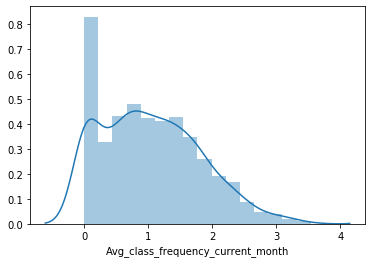

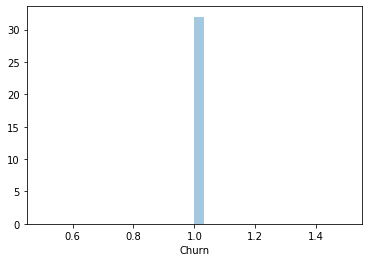

In [7]:
for col  in client.columns:
    sns.distplot(ottok[col])    
    plt.show()

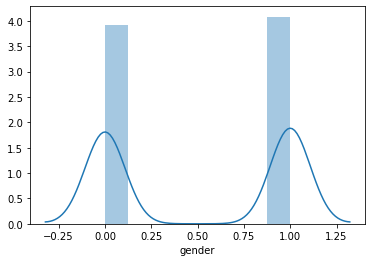

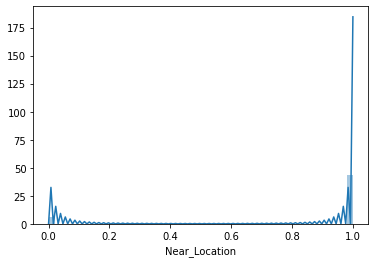

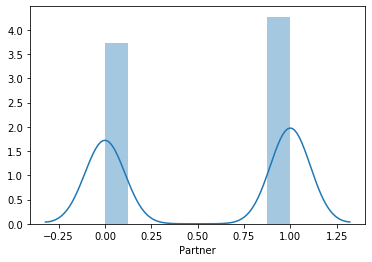

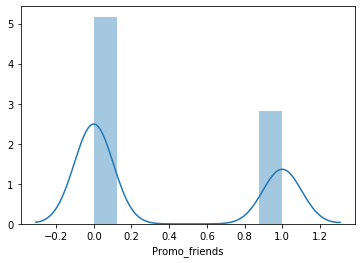

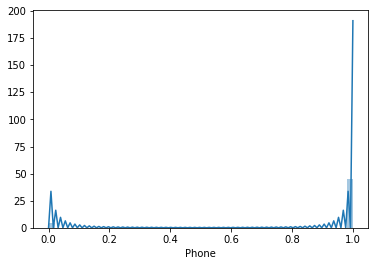

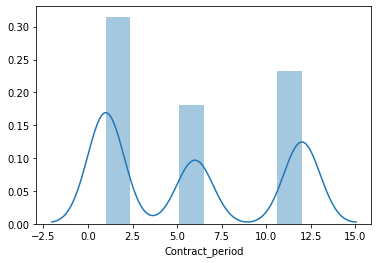

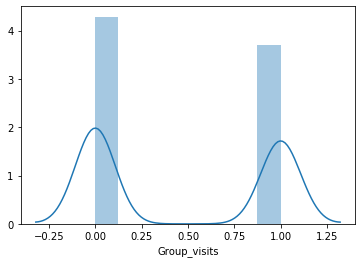

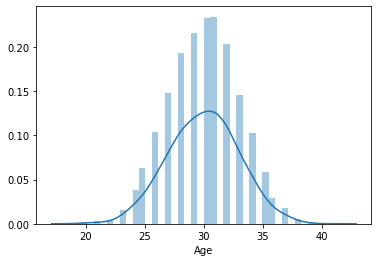

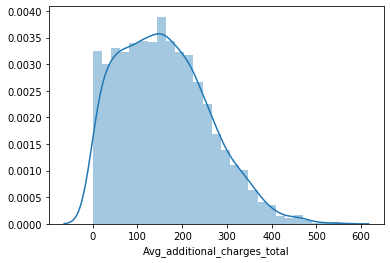

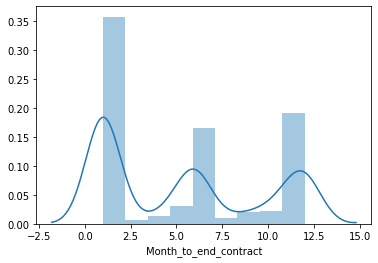

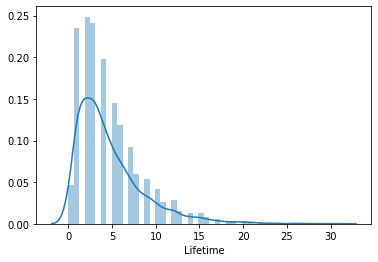

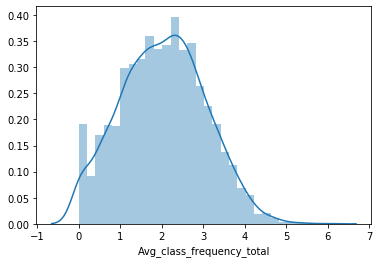

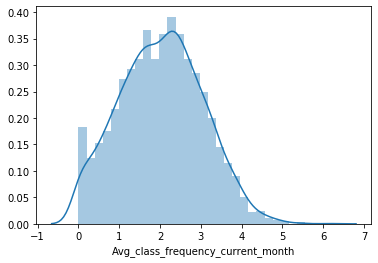

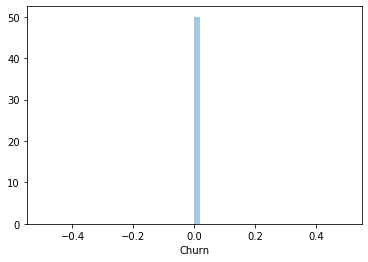

In [8]:
for col in client.columns:
    sns.distplot(client[col])    
    plt.show()

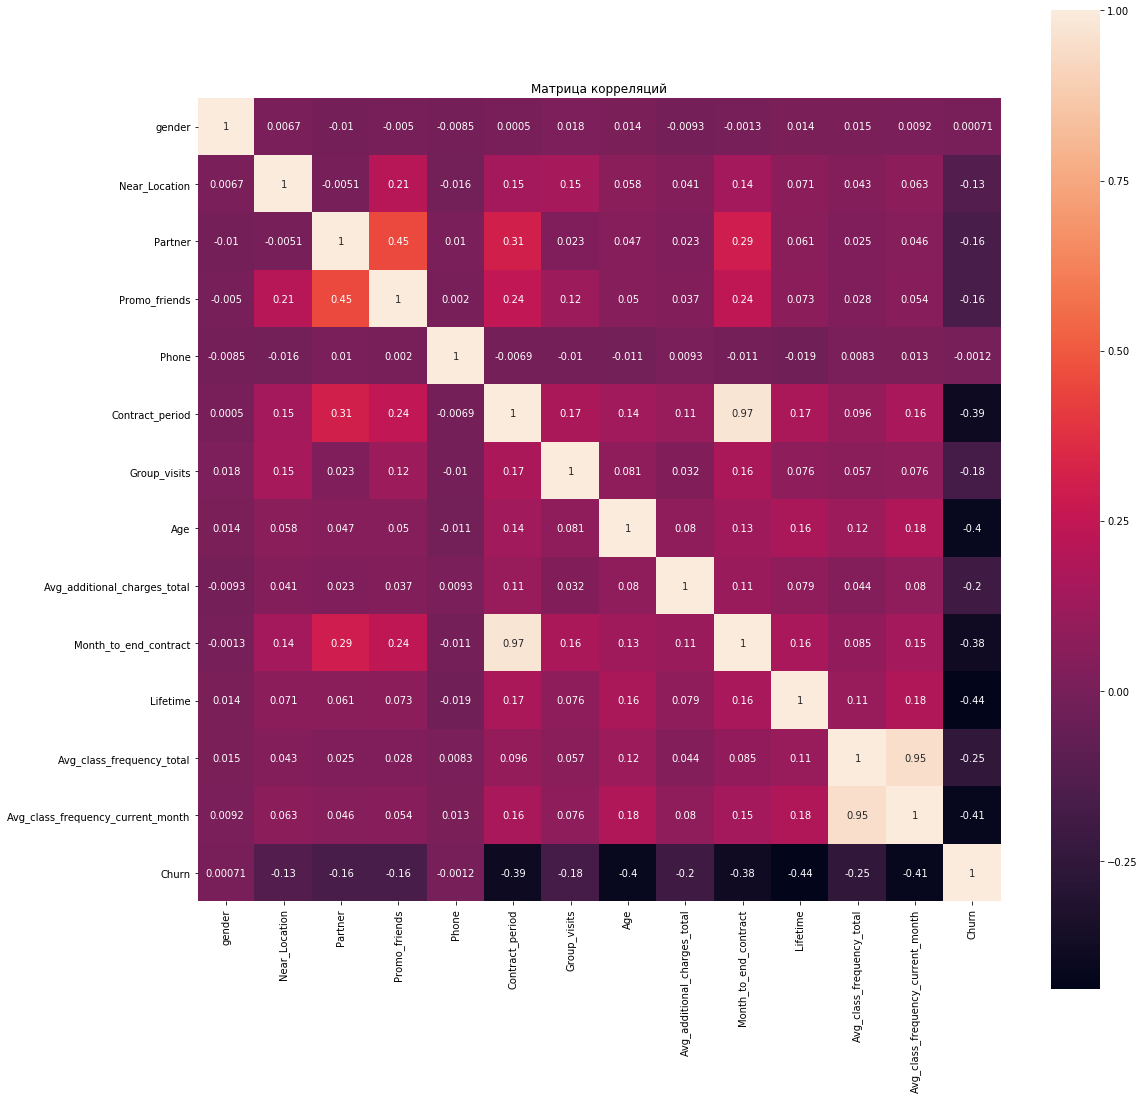

In [9]:
cm = df.corr() 

fig, ax = plt.subplots(figsize=(18, 18))
ax.title.set_text('Матрица корреляций')
sns.heatmap(cm, annot = True, square=True)

plt.show()

### Вывод
Интересующий нас параментр оттока имеет высокую обратную корреляцию со многими признаками - возраст, среднее количество посещений, лайфтайм, период контракта, в меньшей степени с посещением групповых занятий, программой сотрудничества, акцией приведи друга, оттдаленостью от клуба. Почти не влияет наличие оставленного телефона и пол.
Кроме того можно заметить:
Самая высокая корреляция между  длительностю текущего действующего абонемента и сроком до окончания текущего действующего абонемента - что естественно и можно не учитывать, как и корреляцию между средним количеством посещений в неделю и в последний месяц. Более интересная информация, что есть корреляция между акцией "приведи друга" и программой сотрудничества с партнерами.  

<a id='Section 3'></a>
## Модель прогнозирования оттока клиентов

In [10]:
# разделим наши данные на признаки (матрица X) и целевую переменную (y)
X = df.drop('Churn', axis = 1)
y = df['Churn']

# разделяем модель на обучающую и валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [11]:
# зададим алгоритм для модели логистической регрессии
lr_model = LogisticRegression()
# обучим модель
lr_model.fit(X_train, y_train)
# воспользуемся уже обученной моделью, чтобы сделать прогнозы
lr_predictions = lr_model.predict(X_test)
lr_probabilities = lr_model.predict_proba(X_test)[:,1]
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, lr_predictions)))
print('Precision: {:.2f}'.format(precision_score (y_test, lr_predictions)))
print('Recall: {:.2f}'.format(recall_score (y_test, lr_predictions))) 


Accuracy: 0.93
Precision: 0.86
Recall: 0.83


In [12]:
#Обучим модель случайным лесом
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)


# воспользуемся уже обученной моделью, чтобы сделать прогнозы
tree_predictions = tree_model.predict(X_test)
tree_probabilities = tree_model.predict_proba(X_test)[:,1]

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, tree_predictions)))
print('Precision: {:.2f}'.format(precision_score (y_test, tree_predictions)))
print('Recall: {:.2f}'.format(recall_score (y_test, tree_predictions))) 

Accuracy: 0.90
Precision: 0.78
Recall: 0.81


### Вывод
Похоже, что показатели логистической регрессии точнее. 

<a id='Section 4'></a>
## Кластеризация клиентов

In [13]:
data= df.drop('Churn', axis = 1)

In [14]:
# стандартизируем данные
sc = StandardScaler()
X_sc = sc.fit_transform(data)

linked = linkage(X_sc, method = 'ward') 


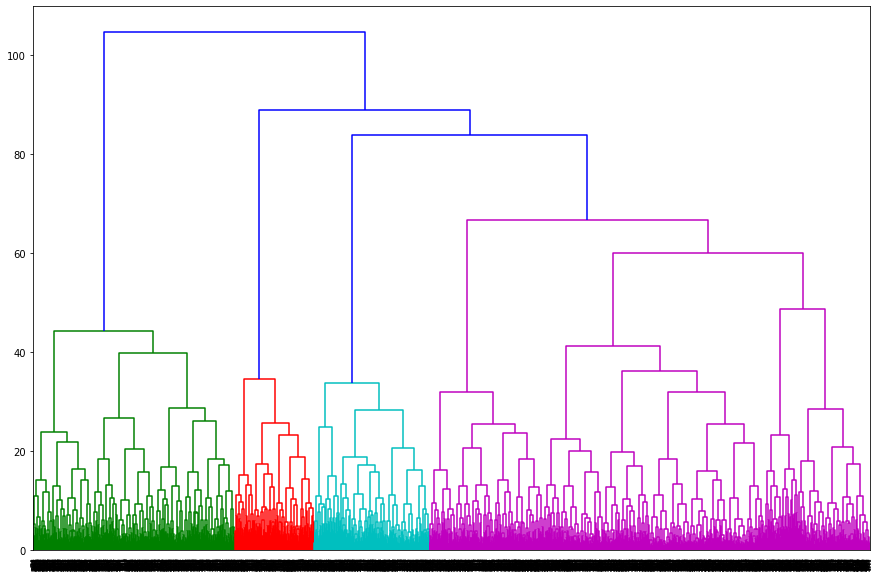

In [15]:
# Визуализируем
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.show() 

На основании дендрограммы можно выделить 5 кластеров

In [15]:
# задаём модель k_means с числом кластеров 5
km = KMeans(n_clusters = 5) 
# прогнозируем кластеры для наблюдений 
labels = km.fit_predict(X_sc)

# сохраняем метки кластера в поле нашего датасета
df['cluster_km'] = labels
# выводим статистику по средним значениям наших признаков по кластеру
clast =df.groupby('cluster_km').mean()
clast.T

cluster_km,0,1,2,3,4
gender,0.553672,0.501582,0.500577,0.486179,0.523316
Near_Location,0.853107,0.949367,0.936563,0.716260,0.862694
Partner,0.259887,0.829114,0.738178,0.301626,0.471503
Promo_friends,0.053107,0.998418,0.478662,0.018699,0.305699
Phone,1.000000,1.000000,1.000000,1.000000,0.000000
Contract_period,2.601130,3.083861,11.854671,1.912195,4.777202
Group_visits,0.438418,0.447785,0.546713,0.275610,0.427461
Age,30.010169,29.118671,29.889273,28.091057,29.297927
Avg_additional_charges_total,159.817667,141.840116,163.418253,129.549057,144.208179
Month_to_end_contract,2.422599,2.884494,10.798155,1.819512,4.466321


Больше всего отток в кластере 1. Для них характерно - маленький период контракта, они приносят меньше дохода по продажам сопутствующих тваров, в среднем они моложе остальных на 1-2 года, они меньше были членами клуба, меньше посещают групповые занятия, проживают они далеко от клуба.
Кластер 3 самый выгодный в их группе больше всего клиентов партерских программ, часто приходят через друзей, длинный контрактный период, они больше всего приносят прибыли за покупку других товаров, у них самый долгий контракт и они больше остальных посещают групповые занятия.

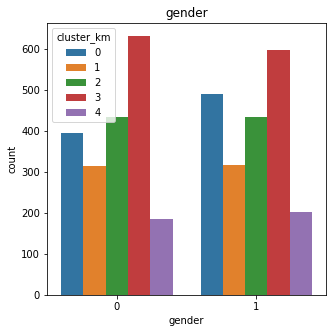

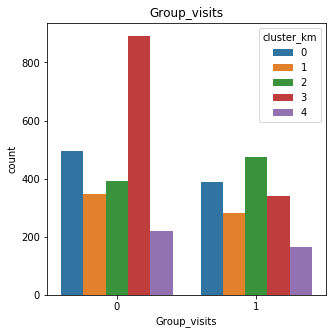

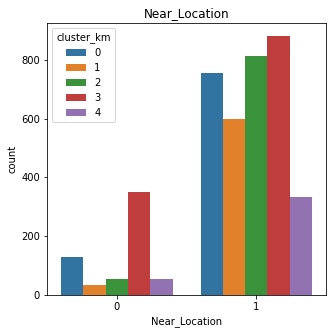

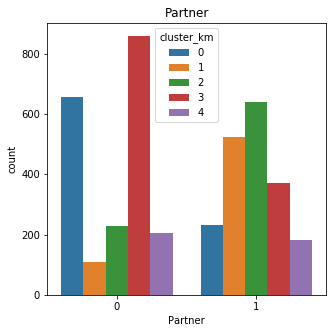

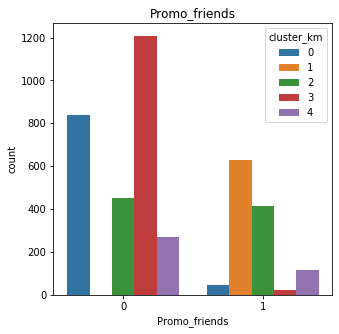

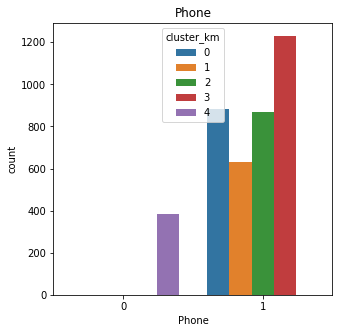

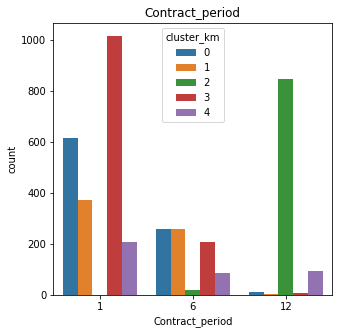

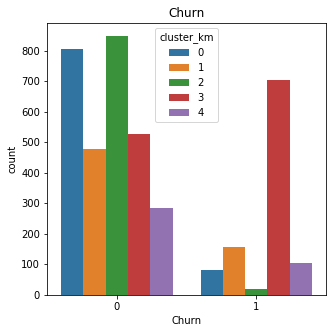

In [16]:
# отрисуем графики распределения признаков по класстерам

for column in ['gender', 'Group_visits','Near_Location', 'Partner', 'Promo_friends', 'Phone','Contract_period',  'Churn']:
    plt.figure(figsize=(5, 5))
    sns.countplot(x = df[column], hue='cluster_km', data=df)
    plt.title(column)
    plt.show()

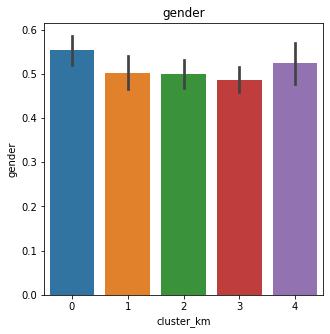

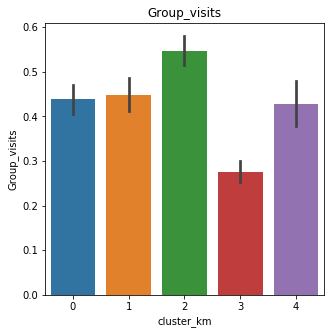

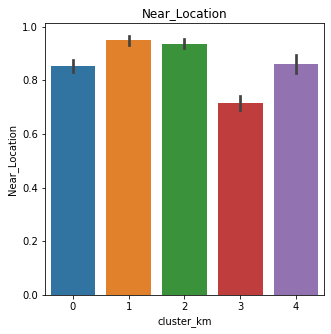

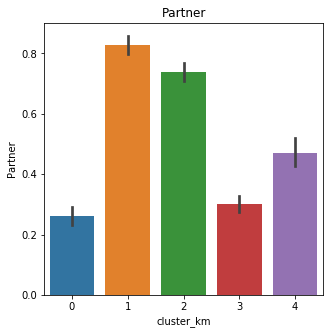

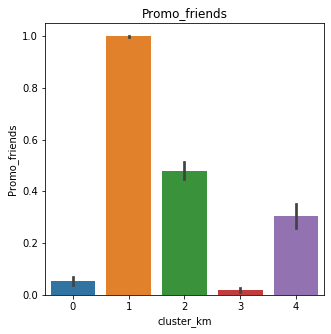

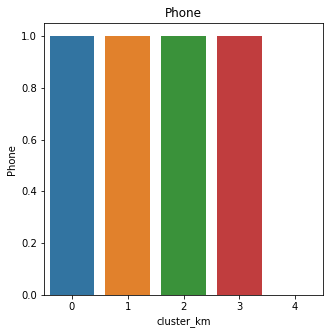

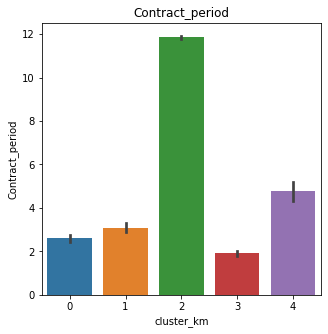

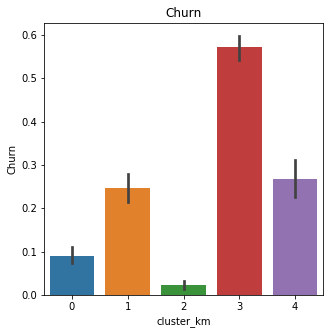

In [19]:

for column in ['gender', 'Group_visits','Near_Location', 'Partner', 'Promo_friends', 'Phone','Contract_period',  'Churn']:
    plt.figure(figsize=(5, 5))
    sns.barplot(y = df[column], x='cluster_km', data=df)
    plt.title(column)
    plt.show()

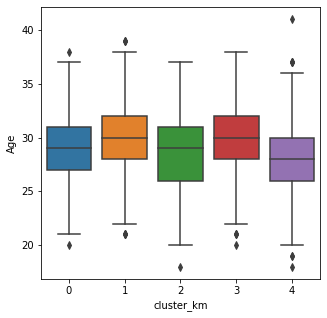

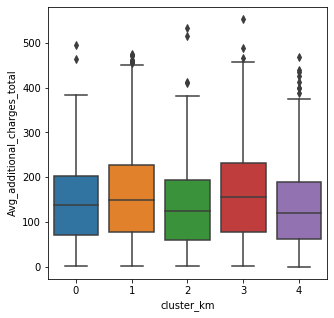

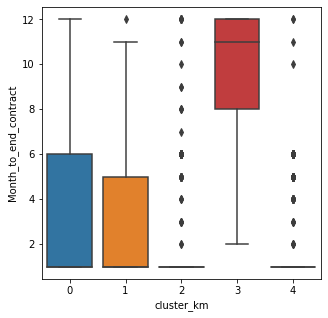

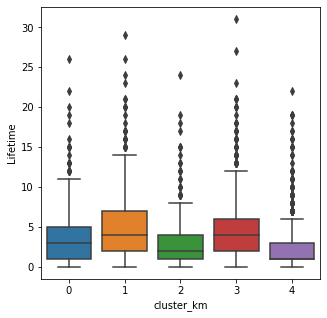

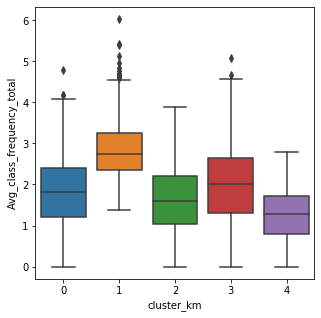

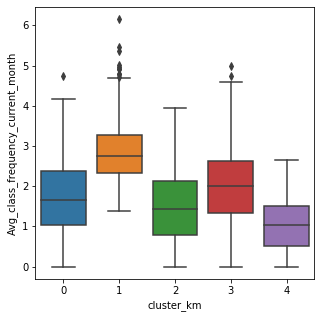

In [19]:
for column in ['Age', 'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime', 'Avg_class_frequency_total', 'Avg_class_frequency_current_month']:
    plt.figure(figsize=(5, 5))
    sns.boxplot(x = 'cluster_km', y = df[column], data = df)
    plt.show()

### Вывод
Визуализация подтверждает сделанные выше выводы. Самые лояльные кластеры - 3 и 2, в среднем клиенты в этой группе старше, они приносят больше прибыли по сопутсвующим товарам. Третий клстер в отрыве от остальных по сроку до окончания текущего действующего абонемента, зато второй кластер дольше всего, дольше даже 3 кластера, является клиентом клуба, они близко находятся от клуба, часто бывают учатниками программы "приведи друга" и партнерской программы.

Самый опасный кластер  - 1, они чуть моложе остальных, меньше всего приносят прибыль по товарам, они меньше всего участвуют в программе "приведи друга", у них самый короткий период контракта,они недавно пришли в клуб - самая "молодая" группа, они меньше всего посещают зал и групповые занятия. При этом это самый многочисленный кластер. 
Нулевой кластер отличается тем, что они не оставили телефона. 

In [20]:
data_part = df.groupby('cluster_km').agg({'gender':'count', 'Churn':'sum'})
data_part['part'] = data_part['Churn']/data_part['gender']
data_part

,gender,Churn,part
cluster_km,,,
0,385,103,0.267532
1,848,57,0.067217
2,505,224,0.443564
3,1003,28,0.027916
4,1259,649,0.515488


Самый большой отток в 1 кластере, затем 0 и 4. Самые надежные 3 и 2

<a id='Section 5'></a>
## Выводы и рекомендации

* Наиболее надежные клиенты это те, кто пришел через друзей, либо партнерскую программу. Давние клиенты также надежны. Клиенты у которых долгий срок абонемента - также не вызывают опсений. 
* Проблемные клиенты: особое внимание стоит удилять новичкам, которых ничего не держит в клубе(друзья или партнерские программы), особенно клиентам младше 29 лет и тем, кто живет далеко от клуба. 
* Следует мотивировать людей чаще посещать клуб, чем реже посещение, тем больше вероятность того, что клиент отвалится.
* Необходимо обратить внимание на тех, кто не оставляет своего номера телефона, возможно, из-за того, что с ними мало связи, до них не доходит информация об акциях, новых тренировках и т.п.